In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

In [14]:
dataset = pd.read_csv('./data/diabetes.csv')
#Instancias y atributos del dataset
print("\nNúmero de instancias: ", dataset.shape[0])
print("\nNúmeros de atributos por instancia: ", dataset.shape[1])
#Nombre de la varaible de salida y su tipo
target = dataset.columns[-1]#Pista tiene 1 y 0
print("\nVariable de salida: ", target)
print("\nTipo de variable de salida: ", dataset[target].dtype)
#Datos faltantes por atributo de las instancias
print("\n",dataset.isnull().sum())



Número de instancias:  768

Números de atributos por instancia:  10

Variable de salida:  Outcome

Tipo de variable de salida:  int64

 Unnamed: 0                   0
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [17]:
#Verificar si hay atributos categoricos y sus categorias
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [67]:
from sklearn.model_selection import train_test_split
data = dataset.drop(columns=['Unnamed: 0'], axis = 1)
dataset_train, dataset_test = train_test_split(data, test_size=0.2, random_state=0, stratify=dataset[target])
dataset_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
22,7,196,90.0,NaN,0.0,39.8,0.451,41,1
497,2,81,72.0,15.0,76.0,30.1,0.547,25,0
395,2,127,58.0,24.0,275.0,27.7,1.600,25,0
381,0,105,68.0,22.0,0.0,20.0,0.236,22,0
258,1,193,50.0,16.0,375.0,25.9,0.655,24,0


Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

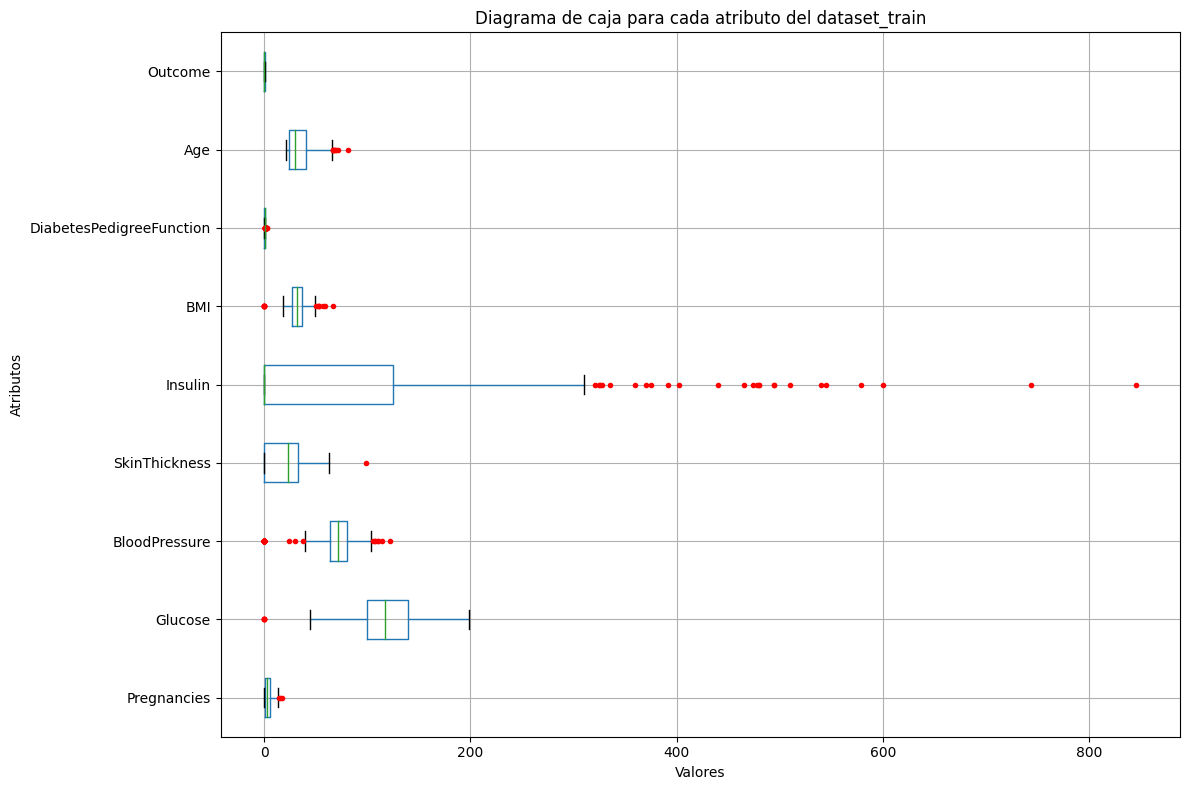

In [30]:
# Crear un diagrama de caja para cada atributo
plt.figure(figsize=(12, 8))
dataset_train.boxplot(sym='r.', vert=False, widths=0.5)
plt.title("Diagrama de caja para cada atributo del dataset_train")
plt.xlabel("Valores")
plt.ylabel("Atributos")
plt.tight_layout()
plt.show()

Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



In [37]:
# Reemplazamos los valores 0 de la columna Glucose, BloodPressure, SkinThickness, Insulin y BMI por np.NaN de los conjuntos de entrenamiento y prueba
# Preguntar si es correcto
dataset_train['Glucose'] = dataset_train['Glucose'].replace(0, np.NaN)
dataset_train['BloodPressure'] = dataset_train['BloodPressure'].replace(0, np.NaN)
dataset_train['SkinThickness'] = dataset_train['SkinThickness'].replace(0, np.NaN)
dataset_train['Insulin'] = dataset_train['Insulin'].replace(0, np.NaN)
dataset_train['BMI'] = dataset_train['BMI'].replace(0, np.NaN)

dataset_test['Glucose'] = dataset_test['Glucose'].replace(0, np.NaN)
dataset_test['BloodPressure'] = dataset_test['BloodPressure'].replace(0, np.NaN)
dataset_test['SkinThickness'] = dataset_test['SkinThickness'].replace(0, np.NaN)
dataset_test['Insulin'] = dataset_test['Insulin'].replace(0, np.NaN)
dataset_test['BMI'] = dataset_test['BMI'].replace(0, np.NaN)

Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

In [40]:
print("\n",dataset_train.isnull().sum())
print("\n",dataset.isnull().sum())
print("\n",dataset_test.isnull().sum())


 Pregnancies                   0
Glucose                       5
BloodPressure                27
SkinThickness               188
Insulin                     316
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

 Unnamed: 0                   0
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

 Pregnancies                  0
Glucose                      0
BloodPressure                8
SkinThickness               39
Insulin                     58
BMI                          3
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

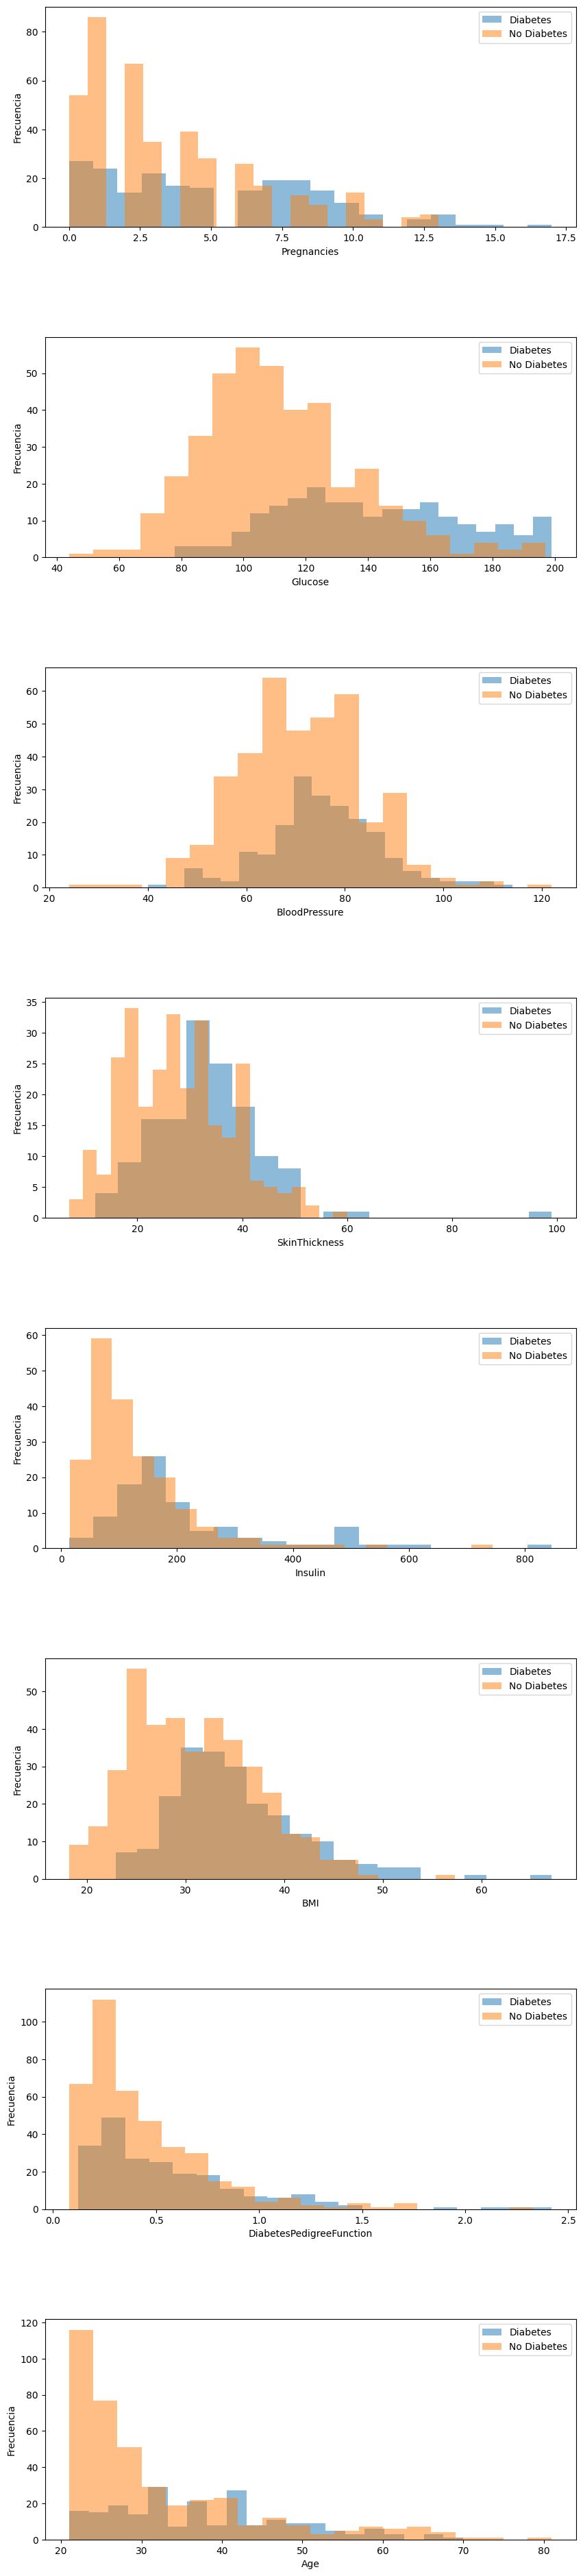

In [47]:
diabetes_p = dataset_train[dataset_train['Outcome'] == 1]
diabetes_n = dataset_train[dataset_train['Outcome'] == 0]
# Seleccionar atributos a visualizar
atributos = dataset_train.columns.drop('Outcome')

# Crear subplots para los histogramas
num_atributos = len(atributos)
fig, axes = plt.subplots(nrows=num_atributos, ncols=1, figsize=(10, 6*num_atributos))
plt.subplots_adjust(hspace=0.5)
colors = ['#1f77b4', '#ff7f0e']
# Iterar sobre los atributos y crear los histogramas en cada subplot
for i, atributo in enumerate(atributos):
    ax = axes[i]
    ax.hist(diabetes_p[atributo], bins=20, alpha=0.5, label='Diabetes', color=colors[0])
    ax.hist(diabetes_n[atributo], bins=20, alpha=0.5, label='No Diabetes', color=colors[1])
    ax.set_xlabel(atributo)
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.show()


In [75]:
imput_dic = {}
for columna in dataset_train.columns:
    if columna != 'Outcome':
        dp_media = diabetes_p[columna].mean()
        dp_mediana = diabetes_p[columna].median()
        dn_media = diabetes_n[columna].mean()
        dn_mediana = diabetes_n[columna].median()
        #print("Atributo: ", columna, "\nMedia diabetes positiva: ", dp_media, "\nMediana diabetes positiva: ", dp_mediana, "\nMedia diabetes negativa: ", dn_media, "\nMediana diabetes negativa: ", dn_mediana, "\n")
        if abs(dp_media - dp_mediana) < abs(dn_media - dn_mediana):
            imput = dp_mediana
        else:
            imput = dn_mediana
        imput_dic[columna] = imput
#Aclaracion de la información encontrada en internet preguntar si es correcto lo que se hizo
"""La comparación verifica si la diferencia entre la media y la mediana en la clase "Diabetes" es menor que la diferencia en la clase "No Diabetes".
Si esta condición es verdadera, significa que la distribución en la clase "Diabetes" tiene menos sesgo hacia la mediana,
por lo que se decide usar la mediana para imputar los valores faltantes.
Si la condición en el punto 4 es falsa, se decide usar la mediana de la clase "No Diabetes" para imputar los valores faltantes.
Este proceso asegura que los valores faltantes se imputen con el valor que tiene una distribución menos sesgada hacia la mediana en su respectiva clase.
Esto puede ser útil para evitar imputaciones sesgadas y garantizar que los datos imputados sean lo más representativos posible de la distribución real de cada clase.
"""
dataset_train_imput = dataset_train.fillna(value=imput_dic)

In [86]:
print("\n",dataset_train_imput.isnull().sum())


 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [90]:
# Separar características (X) y etiquetas (y) para el conjunto de entrenamiento
train_x = dataset_train_imput.drop(target, axis=1)
train_y = dataset_train_imput[target]
print("\n",dataset_train_x.isnull().sum())


 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [79]:
#Para el dataset de test
diab_p = dataset_test[dataset_test['Outcome'] == 1]
diab_n = dataset_test[dataset_test['Outcome'] == 0]
imput_test = {}
for columna in dataset_test.columns:
    if columna != 'Outcome':
        dp_media2 = diab_p[columna].mean()
        dp_mediana2 = diab_p[columna].median()
        dn_media2 = diab_n[columna].mean()
        dn_mediana2 = diab_n[columna].median()
        #print("Atributo: ", columna, "\nMedia diabetes positiva: ", dp_media, "\nMediana diabetes positiva: ", dp_mediana, "\nMedia diabetes negativa: ", dn_media, "\nMediana diabetes negativa: ", dn_mediana, "\n")
        if abs(dp_media2 - dp_mediana2) < abs(dn_media2 - dn_mediana2):
            imput = dp_mediana2
        else:
            imput = dn_mediana2
        imput_test[columna] = imput
dataset_test_imput = dataset_test.fillna(value=imput_dic)
dataset_test_x = dataset_test_imput.drop(target, axis=1)
dataset_test_y = dataset_test_imput[target]

Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

KNN

In [98]:
from sklearn.preprocessing import StandardScaler
#Normalización
scaler = StandardScaler()
scaler.fit(train_x) #Preguntar fit() vs fit_transform()
train_x_sc = scaler.transform(train_x)
test_x_sc = scaler.transform(dataset_test_x)


In [99]:
#Entrenamiento del clasificador knn
from sklearn.neighbors import KNeighborsClassifier
sknn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
sknn.fit(train_x_sc, train_y)


KNeighborsClassifier(n_neighbors=3)

LDA

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit_transform(train_x_sc, train_y)

y_pred_lda = lda.predict(test_x_sc)
np.sum(y_pred_lda != dataset_test_y)

33

SVM

In [113]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf', gamma='auto')
rbf.fit(train_x_sc, train_y)

y_pred_rbf = rbf.predict(test_x_sc)


# Evaluación de Modelos

In [102]:
#Evaluación del clasificador knn
y_pred = sknn.predict(test_x_sc)
print((y_pred==dataset_test_y).all())

False


In [103]:
print("\n",sknn.score(test_x_sc, dataset_test_y))


 0.7987012987012987


In [104]:
from sklearn.metrics import accuracy_score
print("\n",accuracy_score(dataset_test_y, y_pred))


 0.7987012987012987


In [112]:
#LDA
accuracy_lda = accuracy_score(dataset_test_y, y_pred_lda)
print("\n",accuracy_lda)


 0.7857142857142857


In [114]:
#SVM
accuracy_rbf = accuracy_score(dataset_test_y, y_pred_rbf)
print("\n",accuracy_rbf)


 0.7792207792207793
